Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

import warnings
warnings.filterwarnings("ignore")

Load Data

In [2]:
train = pd.read_csv('input/train.csv', index_col='Id')
test = pd.read_csv('input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train.SalePrice
train.drop(['SalePrice'], axis=1, inplace=True)

Exploratory Data Analysis

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Data Visualization

<AxesSubplot:xlabel='SalePrice'>

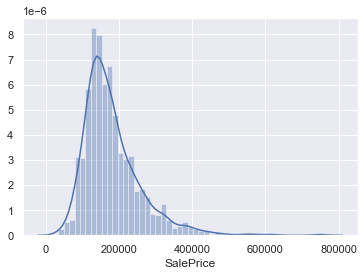

In [6]:
sns.distplot(y)

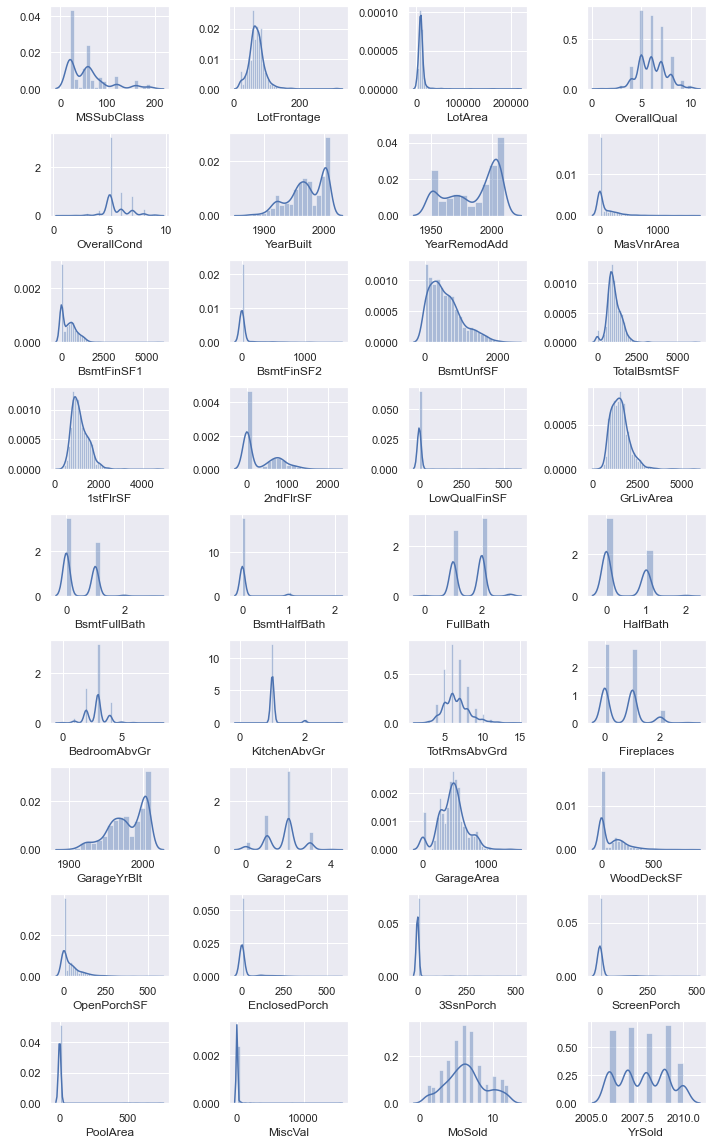

In [7]:
numerical_cols = train.select_dtypes(exclude='object').copy()

fig = plt.figure(figsize=(10,16))
for i in range(len(numerical_cols.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_cols.iloc[:,i].dropna())
    plt.xlabel(numerical_cols.columns[i])

plt.tight_layout()
plt.show()

Play with outliers

In [8]:
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['MasVnrArea'] > 1000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)
train = train.drop(train[train['PoolArea'] > 300].index)
train = train.drop(train[train['OpenPorchSF'] > 300].index)

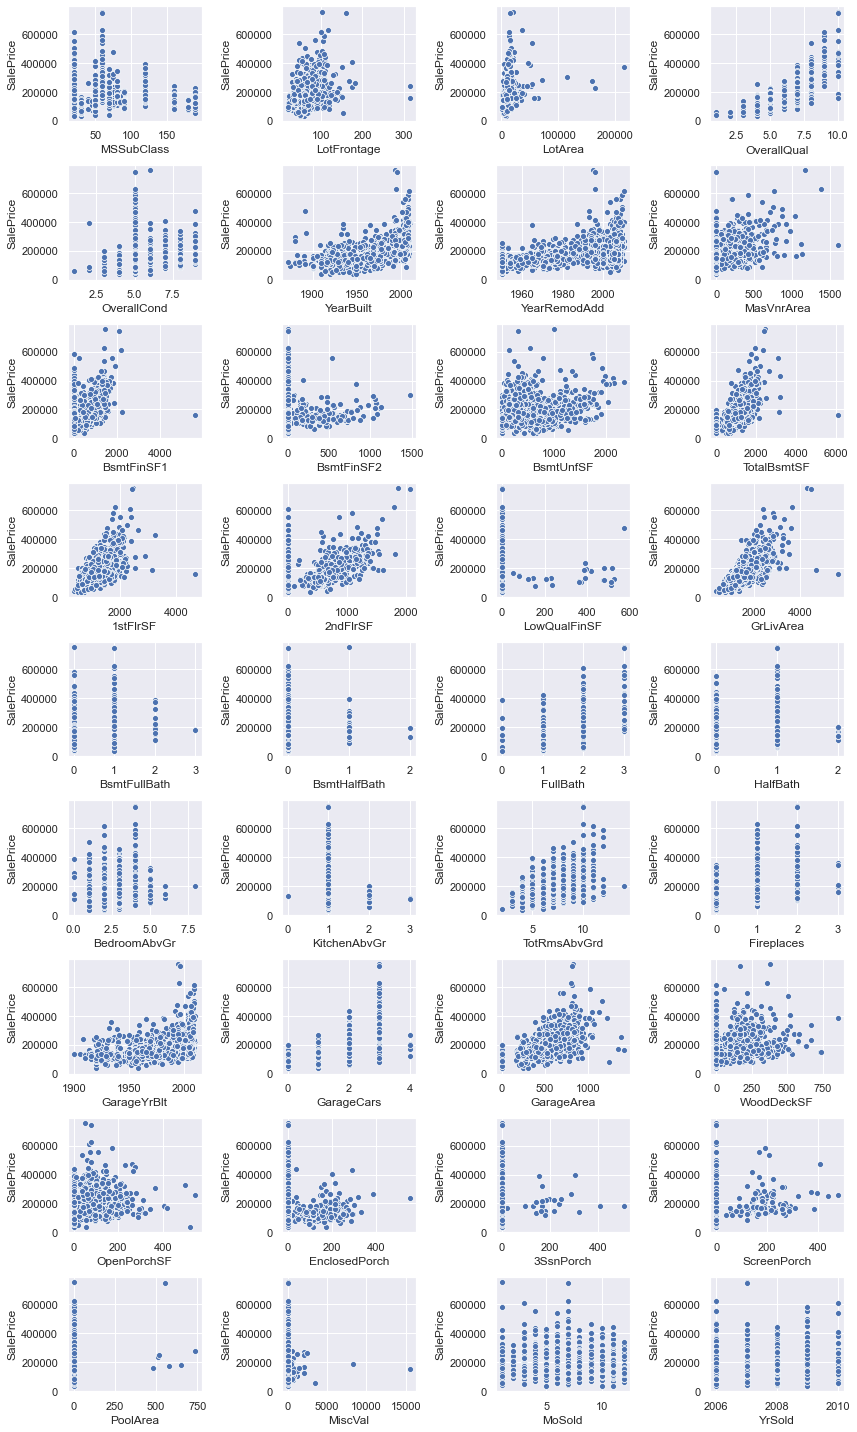

In [9]:
figure = plt.figure(figsize=(12,20))

for i in range(len(numerical_cols.columns)):
    figure.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical_cols.iloc[:,i], y)
    
plt.tight_layout()
plt.show()

In [10]:
def visualize_counts(feature):
    fig = plt.figure(figsize=(14,4))
    sns.countplot(x=feature, data=train)
    plt.xticks(rotation=90)
    plt.ylabel('Counts')
    plt.show()

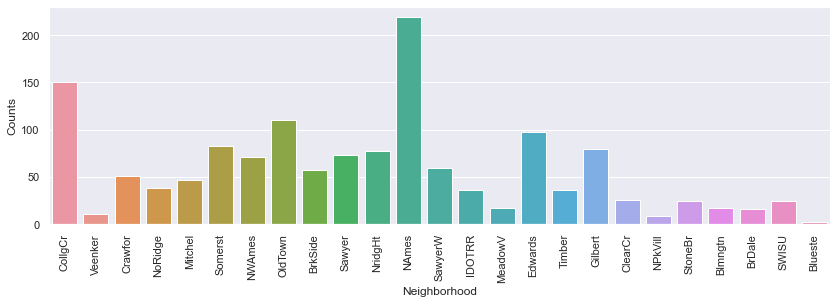

In [58]:
visualize_counts('Neighborhood')

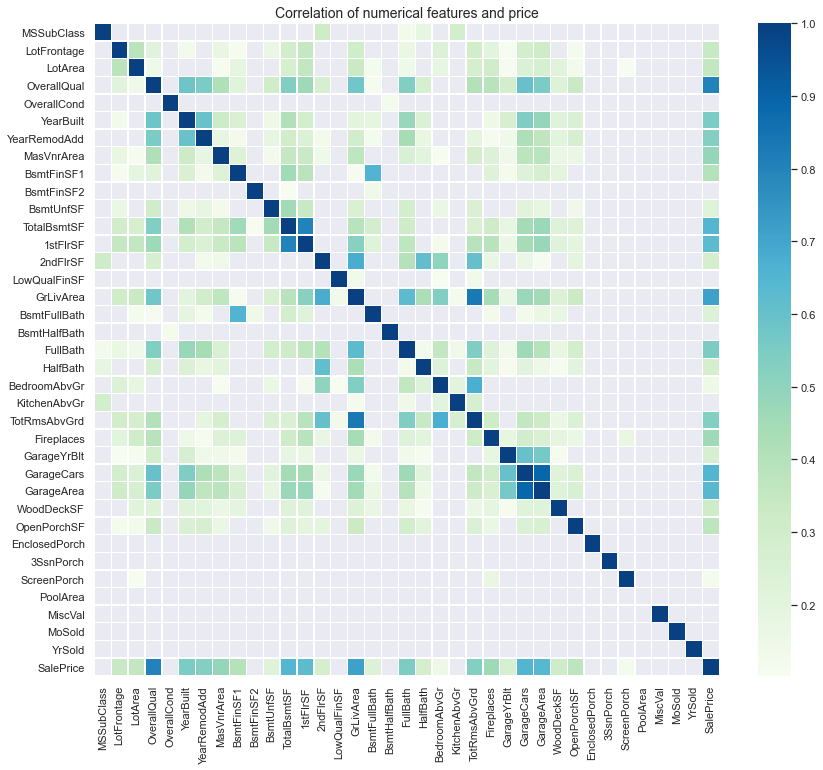

In [59]:
correlation = pd.concat([train, y], axis=1).corr()
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical features and price', size=14)
sns.heatmap(correlation, mask=correlation < 0.1, linewidth=0.4, cmap='GnBu')
plt.show()

In [13]:
pd.concat([train, y], axis=1).corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.802148
GrLivArea       0.712947
GarageCars      0.651829
TotalBsmtSF     0.648443
GarageArea      0.639777
1stFlrSF        0.624945
YearBuilt       0.551528
FullBath        0.550551
TotRmsAbvGrd    0.531044
Name: SalePrice, dtype: float64

Missing Values Analysis

<AxesSubplot:title={'center':'Number of missing rows'}, xlabel='features', ylabel='sum'>

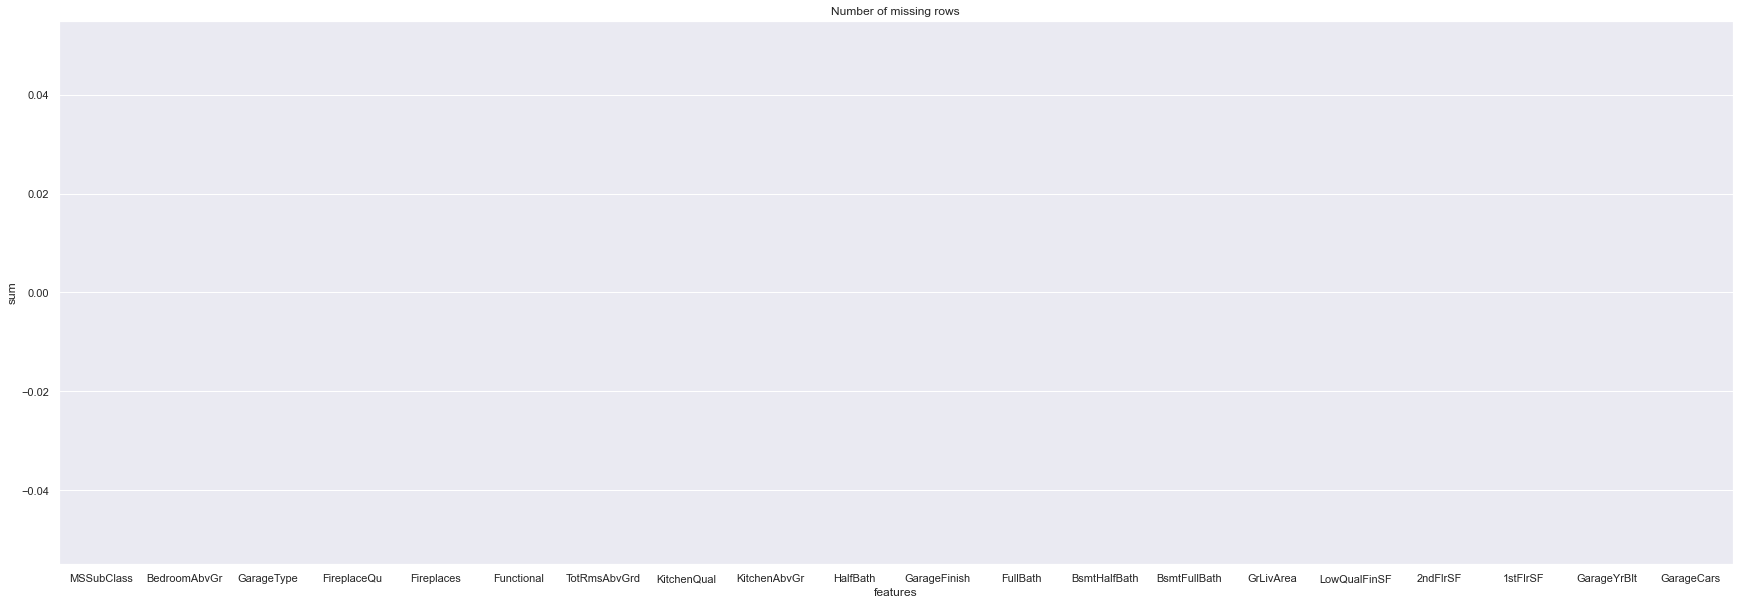

In [60]:
plt.figure(figsize=(30,10))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

In [61]:
missing_values_count = train.isnull().sum().sort_values(ascending=False)
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [16]:
total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()
percent_missing = total_missing / total_cells * 100
print(percent_missing)

6.065327077985306


In [17]:
missing_training_values = train.isnull().sum()
missing_training_values[missing_training_values > 0]

LotFrontage      252
Alley           1342
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      686
GarageType        80
GarageYrBlt       80
GarageFinish      80
GarageQual        80
GarageCond        80
PoolQC          1430
Fence           1158
MiscFeature     1380
dtype: int64

In [18]:
total_cells = np.product(test.shape)
total_missing = missing_values_count.sum()
percent_missing = total_missing / total_cells * 100
print(percent_missing)

5.944768829005474


Dealing With Missing Values

In [19]:
train_test_data = [train, test]

In [20]:
def replace_nan(features):
    for feature in features:
        dataset[feature][dataset[feature].isnull()] = 'None'

In [21]:
nan_indicates_none = ['Alley', 'MasVnrType', 'BsmtQual','BsmtCond', 'BsmtFinType1', 
                      'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                      'GarageQual', 'GarageCond', 'BsmtExposure', 'PoolQC', 'Fence', 
                      'MiscFeature', 'Exterior1st', 'Exterior2nd']

for dataset in train_test_data:
    replace_nan(nan_indicates_none)

In [22]:
#LotFrontage
for dataset in train_test_data:
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].dropna().mean())

In [23]:
#Electrical
for dataset in train_test_data:
    dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].dropna().sort_values().index[0])

In [24]:
#GarageYrBlt, GarageArea, GarageCars
for dataset in train_test_data:
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)
    dataset['GarageArea'] = dataset['GarageArea'].fillna(0)
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)

In [25]:
#MasVnrArea
for dataset in train_test_data:
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].dropna().mean())

In [26]:
#KitchenQual
for dataset in train_test_data:
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].dropna().sort_values().index[0])

In [27]:
#SaleType
for dataset in train_test_data:
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].dropna().sort_values().index[0])

In [28]:
#TotalBsmtSF
for dataset in train_test_data:
    dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(0)

In [29]:
#TotalBsmtSF
for dataset in train_test_data:
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(0)
    dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(0)

In [30]:
#BsmtFullBath, Functional, BsmtHalfBath, BsmtUnfSF
for dataset in train_test_data:
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)
    dataset['Functional'] = dataset['Functional'].fillna(dataset['Functional'].dropna().sort_values().index[0])
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0)

In [31]:
#MSZoning 
for dataset in train_test_data:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].dropna().sort_values().index[0])

In [32]:
#Utilities
for dataset in train_test_data:
    dataset['Utilities'] = dataset['Utilities'].fillna(dataset['Utilities'].dropna().sort_values().index[0])

In [33]:
missing = test.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

Feature Engineering (Can come back and address outliers)

In [34]:
#log target to reduce skew
y_copy = y.copy()
y_copy = y_copy[train.index]
y_log = np.log(y_copy)

<AxesSubplot:xlabel='SalePrice'>

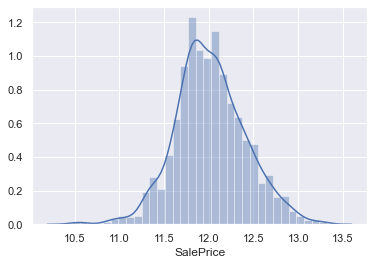

In [35]:
sns.distplot(y_log)

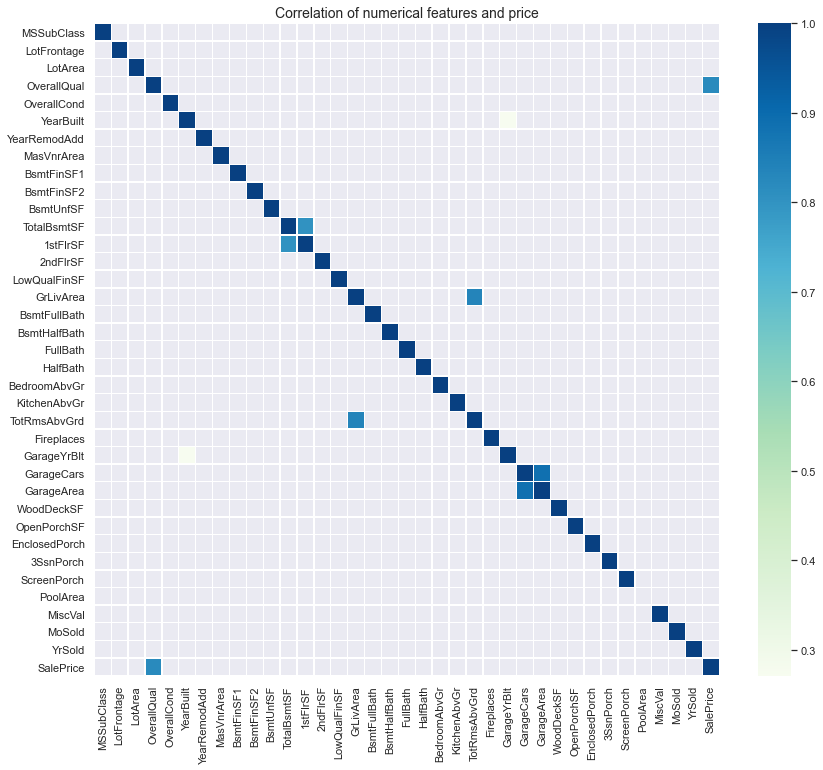

In [36]:
log_correlation = pd.concat([train, y_log], axis=1).corr()
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical features and price', size=14)
sns.heatmap(log_correlation, mask=correlation<0.8, linewidth=0.4, cmap="GnBu")
plt.show()

In [37]:
#Remove highly correlated features which may reduce performance and one-hot encode
high_corr_attributes = ['GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd',
                       'MiscVal', 'MSSubClass', 'MoSold', 'YrSold']

X = train.drop(high_corr_attributes, axis=1)
X = pd.get_dummies(X)


test_X = test.drop(high_corr_attributes, axis=1)
test_X = pd.get_dummies(test_X)

train_X, val_X, train_y, val_y = train_test_split(X, y_log, random_state=1)

#impute any missing values
imputer = SimpleImputer()
train_X = imputer.fit_transform(train_X)
val_X = imputer.transform(val_X)

In [38]:
#Invert log transformation
def inv_y(transformed_y):
    return np.exp(transformed_y)

In [39]:
#Quick train function
def score_model(model):
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    score = mean_absolute_error(inv_y(preds), inv_y(val_y))
    return score

In [40]:
#Save results to a series
results = pd.Series()
results.index.name = 'Model'

In [41]:
#XGBRegressor
xgb = XGBRegressor(learning_rate=0.014,
                   n_estimators=4500,
                   max_depth=4,
                   min_child_weight=0,
                   subsample=0.8,
                   colsample_bytree=0.4,
                   nthread=-1,
                   scale_pos_weight=2,
                   seed=42,)
results['XGB'] = score_model(xgb)

In [42]:
#KNeighbors
knn = KNeighborsRegressor(n_neighbors=3)
results['KNeighbors'] = score_model(knn)

In [43]:
#SVR
svr = SVR(C=1.0, epsilon=0.3)
results['SVR'] = score_model(svr)

In [44]:
#Random Forest
forest = RandomForestRegressor(random_state=1)
results['RandomForestRegressor'] = score_model(forest)

In [45]:
#AdaBoost
ada = AdaBoostRegressor(n_estimators=300, learning_rate=0.03, random_state=1)
results['ADA'] = score_model(ada)

In [46]:
#Gradient Boosting
grad = GradientBoostingRegressor(n_estimators=300, 
                                 learning_rate=0.03, 
                                 max_depth=4, 
                                 random_state=1)

results['Grad'] = score_model(grad)

In [47]:
#LightGBM
light = LGBMRegressor(n_estimators=3500,
                      num_leaves=5,
                      learning_rate=0.007,
                      max_bin=160,
                      bagging_fraction=0.35,
                      n_jobs=-1,
                      bagging_seed=40,
                      feature_fraction_seed=40,
                      bagging_freq=7,
                      feature_fraction=0.13,
                      min_data_in_leaf=8)

results['LightGBM'] = score_model(light)

In [48]:
#Lasso
lasso = Lasso(alpha=0.0005, random_state=1)
results['Lasso'] = score_model(lasso)

In [49]:
#ElasticNet
elastic = ElasticNet(alpha=0.02, random_state=1, l1_ratio=0.7)
results['ElasticNet'] = score_model(elastic)

In [50]:
#Ridge
ridge = Ridge(alpha=0.002, random_state=1)
results['Ridge'] = score_model(ridge)

In [63]:
results.sort_values()

Model
Lasso                    13788.161531
XGB                      13844.390385
LightGBM                 14294.477834
Grad                     14822.950293
Ridge                    15733.148019
RandomForestRegressor    17018.581883
ElasticNet               17558.608976
ADA                      22584.551915
KNeighbors               29156.829950
SVR                      32324.323682
dtype: float64

In [52]:
#impute any missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)
n_folds = 10

lasso_scores = cross_val_score(lasso, imputed_X, y_log, scoring='neg_mean_squared_error', cv=n_folds)
lasso_rmse_cv_scores = np.sqrt(-lasso_scores)


print('Lasso Mean RMSE = ' + str(lasso_rmse_cv_scores.mean().round(decimals=3)))
print('Error std deviations = ' +str(lasso_rmse_cv_scores.std().round(decimals=3)))

Lasso Mean RMSE = 0.108
Error std deviations = 0.015


In [53]:
lgbm_scores = cross_val_score(light, imputed_X, y_log, scoring='neg_mean_squared_error', cv=n_folds)
lgbm_rmse_cv_scores = np.sqrt(-lgbm_scores)


print('LGBM Mean RMSE = ' + str(lgbm_rmse_cv_scores.mean().round(decimals=3)))
print('Error std deviations = ' +str(lgbm_rmse_cv_scores.std().round(decimals=3)))

LGBM Mean RMSE = 0.11
Error std deviations = 0.014


In [54]:
# Tuning Lasso
param_grid = [{'alpha': [0.0007, 0.0003, 0.0004, 0.0005, 0.0055, 0.005, 0.002]}]
best = Lasso()

grid = GridSearchCV(best, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(imputed_X, y_log)
grid.best_params_

{'alpha': 0.0005}

In [55]:
# #Tuning LGBM
# second_best = LGBMRegressor()
# param_grid = {
#     'n_estimators' : [3500, 3000],
#     'num_leaves' : [5, 6],
#     'learning_rate' : [0.007],
#     'max_bin' : [100, 160, 180],
#     'bagging_fraction' : [0.35711, 0.66],
#     'bagging_seed' : [42, 88],
#     'feature_fraction_seed' : [42, 29],
#     'bagging_freq' : [7, 10],
#     'feature_fraction' : [0.13, 0.19],
#     'min_data_in_leaf' : [4, 8],
# }
# grid = GridSearchCV(second_best, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid.fit(imputed_X, y_log)
# grid.best_params_

In [56]:
#ensure same alignment
final_train, final_test = X.align(test_X, join='left', axis=1)
final_test_imputed = imputer.transform(final_test)

In [57]:
#initialize final model and compute predictions
final_model = Lasso(alpha=0.0005, random_state=1)
final_train_imputed = imputer.fit_transform(final_train)
final_model.fit(final_train_imputed, y_log)

test_predictions = final_model.predict(final_test_imputed)
submission = pd.DataFrame({
    'Id' : test.index,
    'SalePrice' : inv_y(test_predictions)
})

submission.to_csv('submission.csv', index=False)

Ways to improve: play with features, blend models 